# Przewidywanie rezygnacji ze studiów 

## Autorzy projektu
- Oktawian Kausz (*217601*)
- Izabela Kołodziejska (*217260*)
- Piotr Kula (*217302*)
- Kamil Marszałek (*217241*)

## Streszczenie

Za pomocą metod machine learning klasyfikujemy studentów do poszczególnej kategorii: porzucenie studiów lub sukcesywne ukończenie szkoły.  Do analizy wykorzystywane są czynniki ekonomiczne, demograficzne i socjologiczne. 

## Słowa kluczowe


- **Naive Bayes** - prosty, probabilistyczny model klasyfikacji, który zakłada niezależność między cechami
- **Metoda najbliższego sąsiada** - klasyfikuje nowe dane na podstawie większościowej klasy najbliższych sąsiadów w przestrzeni cech
- **SVM (Support Vector Machine)** - metoda klasyfikacyjna, która znajduje optymalną hiperplan rozdzielający klasy w wielowymiarowej przestrzeni cech, maksymalizując margines między nimi
- **Drzewa klasyfikacyjne** - modele decyzyjne, które iteracyjnie dzielą dane na mniejsze podzbiory w oparciu o wartości cech, tworząc strukturę hierarchiczną prowadzącą do ostatecznych decyzji klasyfikacyjnych
- **Lasy losowe** - złożony model oparty na agregacji wielu drzew decyzyjnych, aby poprawić dokładność i stabilność klasyfikacji.
- **Sieci neuronowe** - złożone modele inspirowane strukturą mózgu, składające się z warstw neuronów, które przetwarzają dane w sposób hierarchiczny i są zdolne do uczenia się złożonych wzorców

## Wprowadzenie 

Rezygnowanie ze studiów to obecnie powszechne zjawisko, które niesie za sobą szereg różnych konsekwencji. W celu zniwelowania ryzyka porzucenia akademickiej nauki przez studenta warto przeanalizować jakie czynniki skłaniają do podjęcia takiej decyzji. Dzięki trafnemu przewidywaniu który uczeń porzuci studia akademickie instytucje mogą podjąć odpowiednie środki zapobiegawcze. 

## Przedmiot badania
Przedmiotem badania są studenci różnych kierunków wraz z informacjami na ich temat takimi jak ich pochodzenie, wiek, płeć i inne

## Cel i zakres badania

Celem badania jest przewidzenie, czy danych student zrezygnuje ze studiów czy nie. Użyliśmy klasyfikacji za pomocą 7 metod uczenia maszynowego

# Przegląd literatury

Przewidywanie rezygnacji ze studiów jest kluczowym zagadnieniem w dziedzinie analityki edukacyjnej, mającym na celu identyfikację studentów, którzy są zagrożeni przerwaniem nauki, aby umożliwić wczesną interwencję. W artykule „Predicting Student Dropout and Academic Success” autorstwa Realinho i in. (2022) przedstawiono kompleksową analizę metod przewidywania rezygnacji oraz sukcesu akademickiego studentów, wykorzystując różne techniki analizy danych. 
W literaturze dotyczącej przewidywania rezygnacji ze studiów stosuje się różnorodne techniki analizy danych:
Metody klasyfikacyjne: Drzewa decyzyjne, lasy losowe, sieci neuronowe oraz wektory wspierające (SVM) są powszechnie używane do klasyfikacji studentów na podstawie różnych atrybutów takich jak wyniki w nauce, frekwencja, zaangażowanie w zajęcia oraz demografia.

Wnioski z badania: 
- Techniki takie jak drzewa decyzyjne i lasy losowe okazały się skuteczne w przewidywaniu rezygnacji studentów, zapewniając wysoką dokładność predykcji.
- Wśród najważniejszych czynników wpływających na rezygnację studentów znalazły się: wyniki w nauce, frekwencja na zajęciach, zaangażowanie w dodatkowe aktywności edukacyjne oraz dane demograficzne.
- Na podstawie wyników analizy autorzy sugerują implementację systemów wczesnego ostrzegania, które mogą pomóc w identyfikacji studentów zagrożonych rezygnacją i umożliwić podejmowanie odpowiednich interwencji.
- Badanie porównuje skuteczność różnych modeli analizy danych, wskazując, że niektóre techniki, takie jak lasy losowe, mogą oferować lepszą wydajność w określonych kontekstach edukacyjnych.


## Import odpowiednich bibliotek

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings
from textwrap import wrap
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier



plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Przegląd danych

### Import danych

In [3]:
data = pd.read_csv("data.csv", sep = ';')
df = pd.DataFrame(data)

### Przegląd danych

In [4]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
print("Liczba wierszy:", data.shape[0])
print("Liczba kolumn:", data.shape[1])

Liczba wierszy: 4424
Liczba kolumn: 37


In [6]:
columns_data = pd.read_csv("data_description.csv")
columns_df = pd.DataFrame(columns_data)
pd.set_option('display.max_colwidth', None)
columns_df

,Column,Opis,Wartości
0,Marital status,Stan cywilny,1 – kawaler 2 – żonaty 3 – wdowiec 4 – rozwiedziony 5 – związek faktyczny 6 – formalnie rozdzielony
1,Application mode,Tryb aplikacji,"1 - pierwsza faza - kontyngent ogólny 2 - Rozporządzenie nr 612/93 5 - pierwsza faza - kontyngent specjalny (Wyspy Azorów) 7 - Posiadacze innych kursów wyższych 10 - Rozporządzenie nr 854-B/99 15 - Student międzynarodowy (licencjat) 16 - pierwsza faza - kontyngent specjalny (Wyspa Madera) 17 - druga faza - kontyngent ogólny 18 - trzecia faza - kontyngent ogólny 26 - Rozporządzenie nr 533-A/99, pkt b2) (Inny plan) 27 - Rozporządzenie nr 533-A/99, pkt b3 (Inna instytucja) 39 - Ponad 23 lata 42 - Przeniesienie 43 - Zmiana kursu 44 - Absolwenci specjalizacji technologicznej 51 - Zmiana instytucji/kursu 53 - Absolwenci dyplomu krótkiego cyklu 57 - Zmiana instytucji/kursu (Międzynarodowe)"
2,Application order,Kolejność aplikacji,Kolejność aplikacji (od 0 - pierwszy wybór; do 9 ostatni wybór)
3,Course,Kierunek studiów,33 - Technologie produkcji biopaliw 171 - Projektowanie i projektowanie multimediów 8014 - Usługi społeczne (uczestnictwo wieczorne) 9003 - Agronomia 9070 - Projektowanie komunikacji 9085 - Pielęgniarstwo weterynaryjne 9119 - Inżynieria informatyczna 9130 - Końszczyzna 9147 - Zarządzanie 9238 - Usługi społeczne 9254 - Turystyka 9500 - Pielęgniarstwo 9556 - Higiena jamy ustnej 9670 - Zarządzanie reklamą i marketingiem 9773 - Dziennikarstwo i komunikacja 9853 - Edukacja podstawowa 9991 - Zarządzanie (uczestnictwo wieczorne)
4,Daytime/evening attendance,Obecność (dzienna/wieczorowa),1 – dzienny 0 - wieczorny
5,Previous qualification,Poprzednie kwalifikacje,1 - Wykształcenie średnie 2 - Wyższe wykształcenie - licencjat 3 - Wyższe wykształcenie - stopień 4 - Wyższe wykształcenie - magister 5 - Wyższe wykształcenie - doktorat 6 - Częstotliwość wyższego wykształcenia 9 - 12 rok szkolny - nieukończony 10 - 11 rok szkolny - nieukończony 12 - Inny - 11 rok szkolny 14 - 10 rok szkolny 15 - 10 rok szkolny - nieukończony 19 - Podstawowe wykształcenie 3. cykl (9./10./11. rok) lub równorzędne 38 - Kurs specjalizacji technologicznej 40 - Wyższe wykształcenie - stopień (1. cykl) 42 - Profesjonalny kurs techniczny wyższej uczelni 43 - Wyższe wykształcenie - magister (2. cykl)
6,Previous qualification (grade),Poprzednia kwalifikacja (ocena),Ocena poprzedniej kwalifikacji (między 0 a 200)
7,Nationality,Narodowość,1 - Portugalski; 2 - Niemiecki; 6 - Hiszpański; 11 - Włoski; 13 - Holenderski; 14 - Angielski; 17 - Litewski; 21 - Angolski; 22 - Zielonoświątkowy; 24 - Gwinejski; 25 - Mozambicki; 26 - Santomean; 32 - Turecki; 41 - Brazylijski; 62 - Rumuński; 100 - Mołdawia (Republika); 101 - Meksykański; 103 - Ukraiński; 105 - Rosyjski; 108 - Kubański; 109 - Kolumbijski
8,Mother's qualification,Kwalifikacje matki,1 - Wykształcenie średnie - 12 rok szkolny lub równowartość 2 - Wyższe wykształcenie - licencjat 3 - Wyższe wykształcenie - stopień 4 - Wyższe wykształcenie - magister 5 - Wyższe wykształcenie - doktorat 6 - Częstotliwość wyższego wykształcenia 9 - 12 rok szkolny - nieukończony 10 - 11 rok szkolny - nieukończony 11 - 7 rok (Stary) 12 - Inny - 11 rok szkolny 14 - 10 rok szkolny 18 - Kurs ogólny handlu 19 - Podstawowe wykształcenie 3. cykl (9./10./11. rok) lub równorzędne 22 - Techniczny kurs zawodowy 26 - 7 rok szkolny 27 - 2 cykl ogólnego kursu średniego szkolnictwa 29 - 9 rok szkolny - nieukończony 30 - 8 rok szkolny 34 - Nieznany 35 - Nie umie czytać ani pisać 36 - Może czytać bez ukończenia 4 roku szkolnego 37 - Podstawowe wykształcenie 1. cykl (4./5. rok) lub równorzędne 38 - Podstawowe wykształcenie 2. cykl (6./7./8. rok) lub równorzędne 39 - Kurs specjalizacji technologicznej 40 - Wyższe wykształcenie - stopień (1. cykl) 41 - Kurs specjalistycznych studiów wyższych 42 - Profesjonalny kurs techniczny wyższej uczelni 43 - Wyższe wykształcenie - magister (2. cykl) 44 - Wyższe wykształcenie - doktorat (3. cykl)
9,Father's qualification,Kwalifikacje oj

## Przygotowanie danych do analizy

### Duplikaty


In [7]:
print(f"Liczba duplikatów w danych : {df.duplicated().sum()}")

Liczba duplikatów w danych : 0


### Braki danych

In [8]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### W zbiorze danych nie ma brakujących wartości.

### Nasz zbiór danych spełnia warunki zbioru z kryteriów projektu, ponieważ zawiera conajmniej 10 cech i minimum 800 obserwacji. Nie zawiera również duplikatów, brakujący danych zatem nie ma potrzeby ich usuwania. 

## Wstępna analiza danych

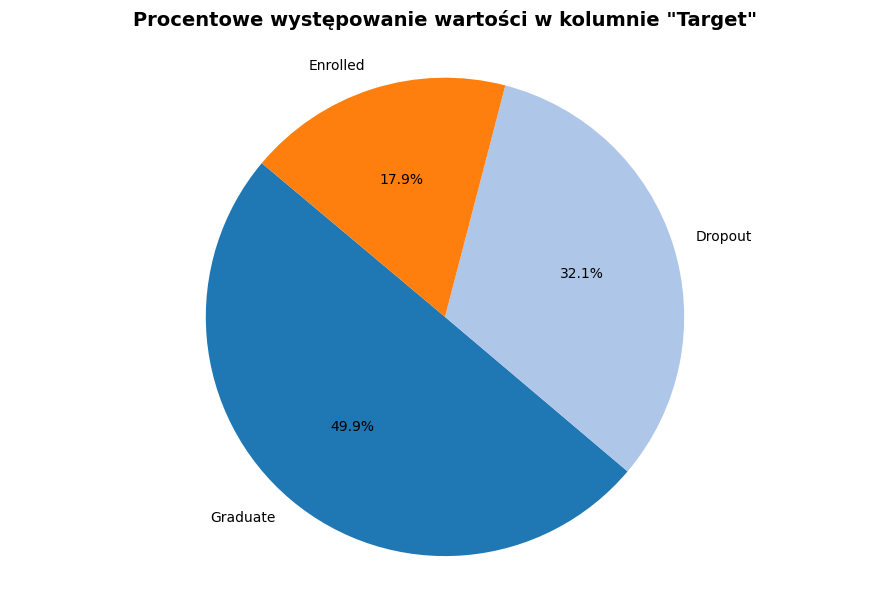

In [9]:
target_counts = df['Target'].value_counts(normalize=True) * 100

plt.figure(figsize=(9, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Procentowe występowanie wartości w kolumnie "Target"', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Jak można zauważyć na wykresie, niemalże połowa badanych studentów ukończyła studia z powodzeniem, około 20% badanych jest w trakcie trwania nauki, a 30% nie udało się dokończyć rozpoczętego kierunku.

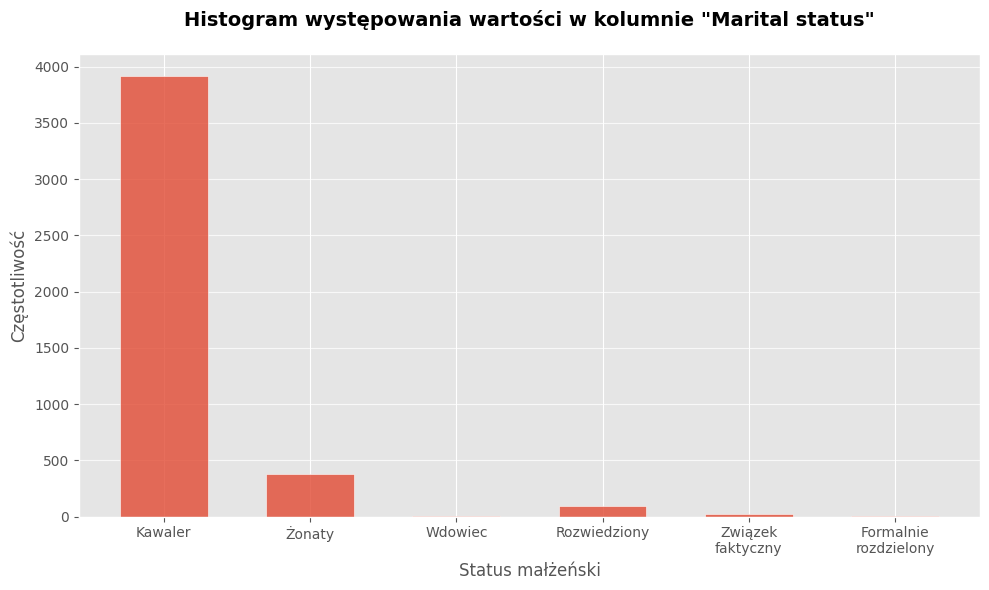

In [10]:
marital_status = df['Marital status']
labels = ['Kawaler', 'Żonaty', 'Wdowiec', 'Rozwiedziony', 'Związek faktyczny', 'Formalnie rozdzielony']
wrapped_labels = ['\n'.join(wrap(label, 12)) for label in labels]

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(marital_status, bins=range(1, 8), edgecolor='white', alpha=0.8, align='mid', rwidth=0.6)

plt.title('Histogram występowania wartości w kolumnie "Marital status"', fontsize=14, fontweight='bold', pad=20)  # Dodanie fontweight
plt.xlabel('Status małżeński', fontsize=12)
plt.ylabel('Częstotliwość', fontsize=12)

plt.xticks(ticks=[i + 0.5 for i in range(1, 7)], labels=wrapped_labels, rotation=0, ha='center')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


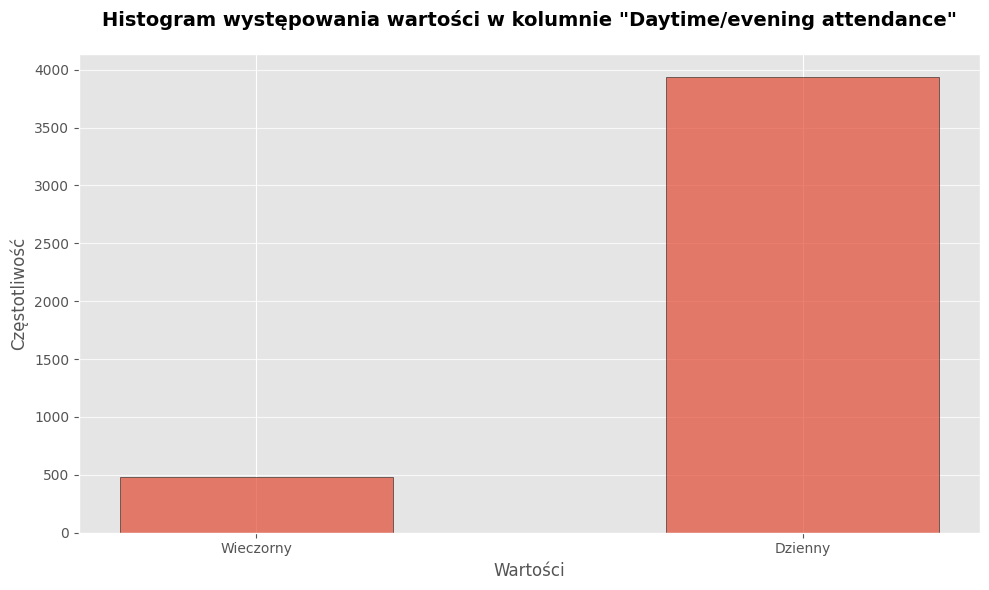

In [11]:
attendance = df['Daytime/evening attendance\t']

plt.figure(figsize=(10, 6))
plt.hist(attendance, bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7, align='mid', rwidth=0.5)  # zmniejszenie szerokości kolumn
plt.title('Histogram występowania wartości w kolumnie "Daytime/evening attendance"', fontweight='bold', fontsize=14, pad=20)
plt.xlabel('Wartości', fontsize=12)
plt.ylabel('Częstotliwość', fontsize=12)

plt.xticks([0, 1], ['Wieczorny', 'Dzienny'])
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

plt.show()

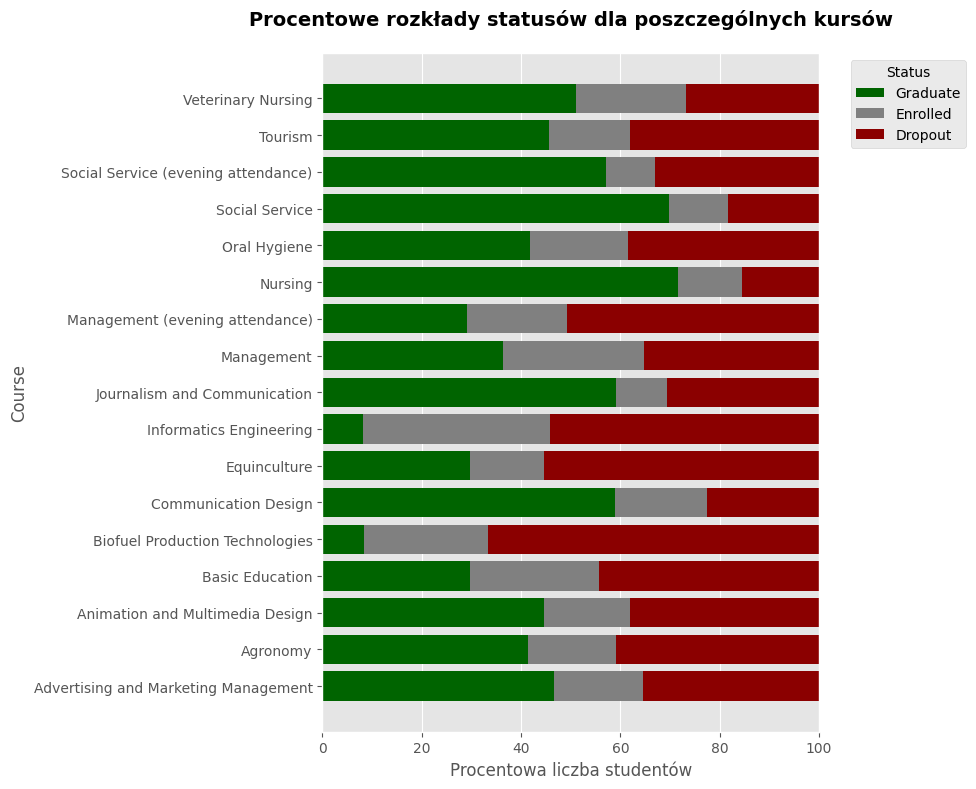

In [12]:
course_names = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

df['Course'] = df['Course'].map(course_names)
grouped = df.groupby('Course')['Target'].value_counts(normalize=True).unstack(fill_value=0) * 100
fig, ax = plt.subplots(figsize=(10, 8))
colors = {'Graduate': 'darkgreen', 'Enrolled': 'grey', 'Dropout': 'darkred'}
bottom = pd.Series(data=[0]*len(grouped), index=grouped.index)

for status in ['Graduate', 'Enrolled', 'Dropout']:
    plt.barh(grouped.index, grouped[status], color=colors[status], label=status, left=bottom)
    bottom += grouped[status]

plt.title('Procentowe rozkłady statusów dla poszczególnych kursów', fontweight='bold', fontsize=14, pad=20)
plt.xlabel('Procentowa liczba studentów')
plt.ylabel('Course')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


## Boxploty, czyli analiza obserwacji odstających

Bierzemy tylko zmienne ilościowe

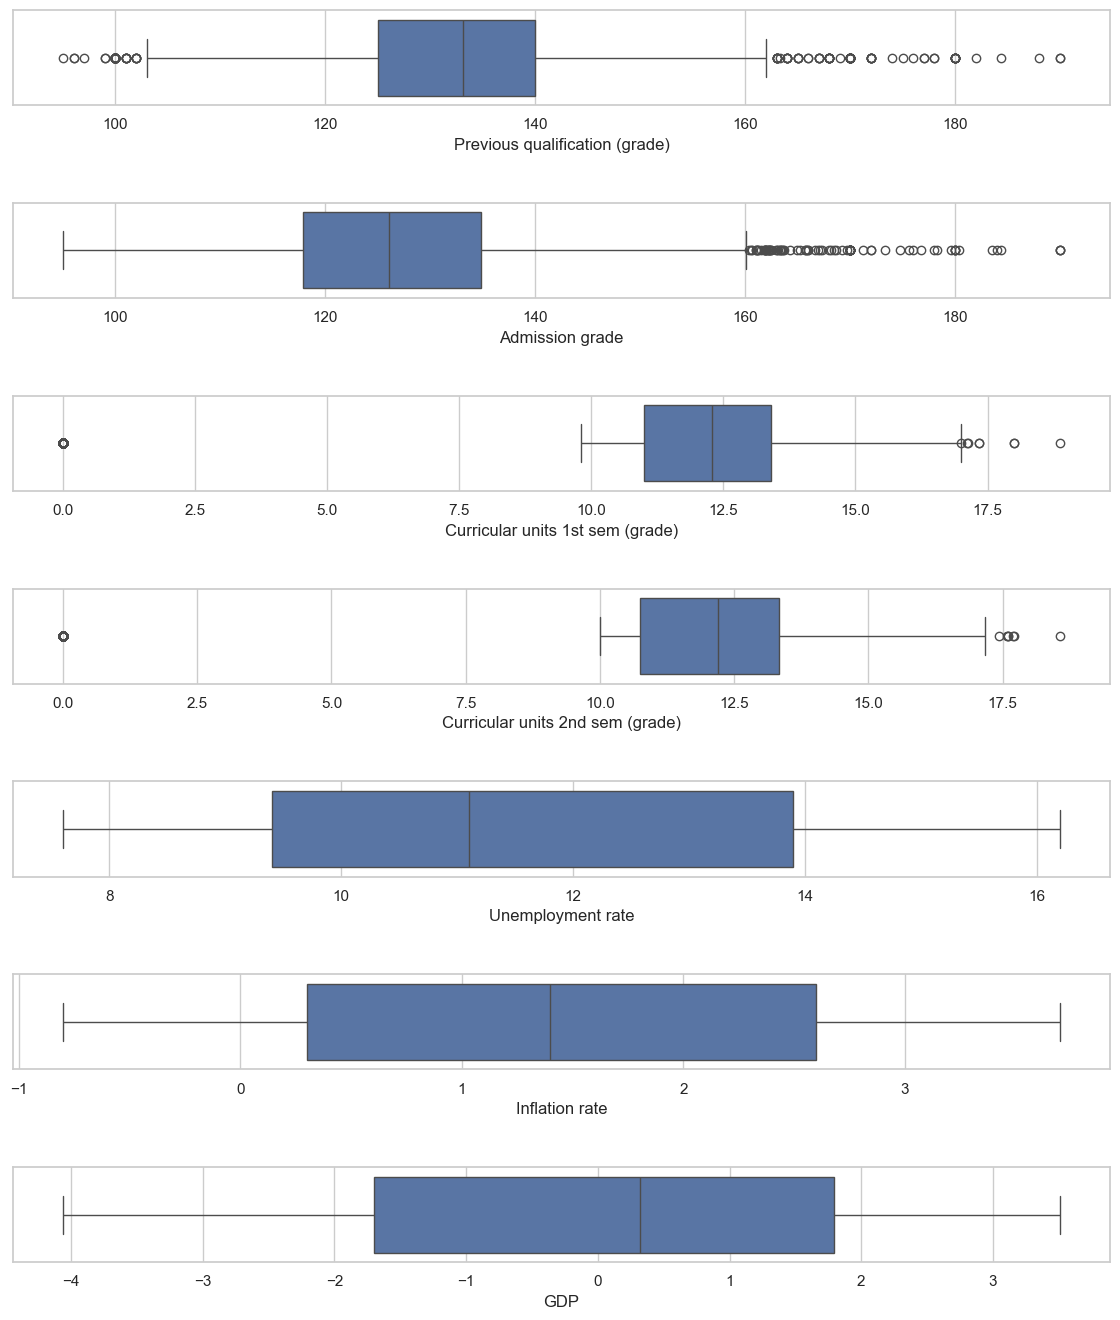

In [13]:
data_num = df.select_dtypes(include=['float64'])
data_num.columns
sns.set_theme(style="whitegrid")


plt.figure(figsize=(12, 14))


for i, column in enumerate(data_num.columns):
    plt.subplot(len(data_num.columns), 1, i + 1)
    sns.boxplot(x=data_num[column])
   # plt.title(f'Boxplot for {column}')
    plt.tight_layout(pad=3.0)


plt.show()

W przypadku takich zmiennych jak admission grade i previous qualification widzimy dużą liczbę zmiennych odstających. Jest to realistyczny wynik m.in. dlatego, że uniwersytety przyjmują na studia kandydatów z różnymi ocenami (czasami liczy się kolejność zgłoszeń albo wymagania na dany kierunek są niższe). W przypadku pozostałych zmiennych ilość odstających obserwacji jest znikoma.  

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Zamiana wartości w kolumnie 'Target' na wartości liczbowe
df['Target'] = le.fit_transform(df['Target'])


### Odrzucenie wartości odstających:

In [15]:
data_num = df.select_dtypes(include=['float64']).columns.tolist()

df_cleaned = df.copy()

for i in data_num:
    Q1 = df_cleaned[i].quantile(0.25)
    Q3 = df_cleaned[i].quantile(0.75)
    IQR = Q3 - Q1
    condition = (df_cleaned[i] >= Q1 - 3 * IQR) & (df_cleaned[i] <= Q3 + 3 * IQR)
    df_cleaned = df_cleaned[condition]

df_cleaned;


## Sprawdzanie korelacji pomiędzy zmiennymi

### Dzielimy zbiór danych na zbiory zmiennych ilościowych i objaśniających

In [16]:
# zmienne ilościowe
data_num = df_cleaned.select_dtypes(include=['float64']).copy()

additional_columns = [
    'Age at enrollment', 
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (without evaluations)', 
    'Curricular units 2nd sem (credited)', 
    'Curricular units 2nd sem (enrolled)', 
    'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (approved)', 
    'Curricular units 2nd sem (without evaluations)'
]

# Dodaj te kolumny do data_num
data_num = pd.concat([data_num, df_cleaned[additional_columns]], axis=1)
data_num = data_num.astype(float)

# .columns.tolist()

# zmienne kategoryczne
data_categ = (df_cleaned.select_dtypes(include=['int64']))
data_categ = data_categ.drop(columns=additional_columns, errors='ignore')

### Teraz dzielę zmienne kategoryczne na te z porządkiem i te bez porządku

In [17]:
data_categ_with_order = [
    'Marital status',
    'Application order',
    'Previous qualification'
]

# Label encoding zmiennych kategorycznych z porządkiem
label_encoder = LabelEncoder()

for column in data_categ_with_order:
    df_cleaned[column + '_encoded'] = label_encoder.fit_transform(df_cleaned[column])


data_categ_without_order = [
    'Age at enrollment', 
    'Application mode', 
    'Nacionality',
    'Mother\'s qualification',
    'Father\'s qualification',
    'Mother\'s occupation',
    'Father\'s occupation',
    'Educational special needs',
    'Displaced',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International'
]

# One-Hot Encoding zmiennych kategorycznych bez porządku

df_cleaned = pd.get_dummies(df_cleaned, columns=data_categ_without_order)
df_cleaned.drop(data_categ_with_order, axis=1, inplace=True)

unused = ['Course', 'Daytime/evening attendance\t', 'Marital status_encoded', 'Application order_encoded', 'Previous qualification_encoded']
df_cleaned = df_cleaned.drop(unused, axis=1);

### Sprawdzamy korelację zmiennych między sobą, oraz zmienną wynikową **Target**

In [18]:
cor = df_cleaned.corr()

In [19]:
correlation_with_target = cor['Target'].drop('Target').abs().sort_values(ascending=False)
correlation_with_target.head(17)

Curricular units 2nd sem (approved)       0.437845
Tuition fees up to date_1                 0.383351
Tuition fees up to date_0                 0.383351
Curricular units 2nd sem (grade)          0.336603
Curricular units 1st sem (approved)       0.316445
Curricular units 1st sem (grade)          0.306604
Scholarship holder_0                      0.250738
Scholarship holder_1                      0.250738
Debtor_0                                  0.248087
Debtor_1                                  0.248087
Curricular units 2nd sem (evaluations)    0.237912
Curricular units 1st sem (evaluations)    0.207912
Gender_0                                  0.187542
Gender_1                                  0.187542
Application mode_1                        0.170474
Application mode_39                       0.142609
Age at enrollment_18                      0.124842
Name: Target, dtype: float64

### Wybieramy zmienne, które mają korelacje z celem >0.1

## Następnie wyrzucamy wysoko skorelowane zmienne między sobą (correlation >0.85)

Liczba zmiennych z korelacją względem 'Target' >0.1:                                    19
Liczba zmiennych z korelacją względem 'Target' >0.1 oraz nieskorelowanych między sobą:  17


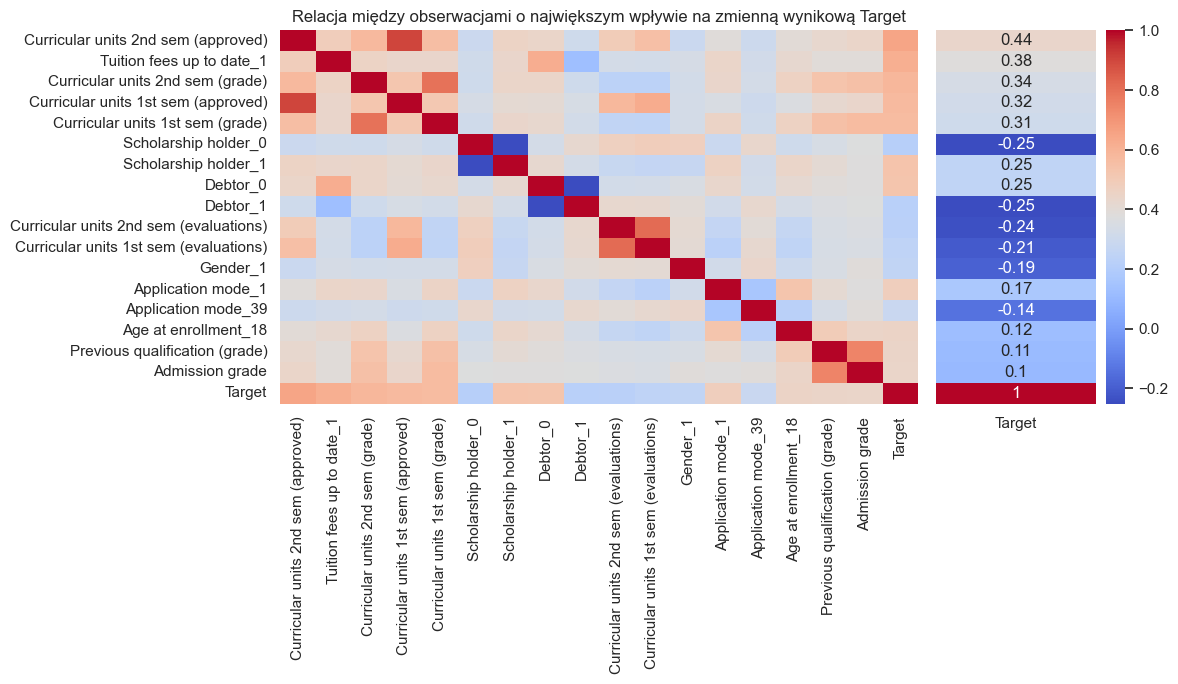

In [20]:
selected_features = correlation_with_target[correlation_with_target > 0.1].index.tolist()

df_cleaned[selected_features]; # zmienne z korelacją względem zmiennej Target >0.1
print("Liczba zmiennych z korelacją względem 'Target' >0.1:                                   ", len(selected_features))

strong_correlated_pairs = cor[selected_features].abs().unstack().sort_values(ascending=False).drop_duplicates()

variables_to_remove = set()
for (var1, var2), corr_value in strong_correlated_pairs.items():
    if corr_value > 0.85 and var1 != var2:
        if var1 not in variables_to_remove:
            variables_to_remove.add(var2)

# Usuń wybrane zmienne
final_selected_features = [var for var in selected_features if var not in variables_to_remove]
print("Liczba zmiennych z korelacją względem 'Target' >0.1 oraz nieskorelowanych między sobą: ", len(final_selected_features))


plt.figure(figsize=(12, 7))
cos = final_selected_features.copy()
cos.append('Target')
cor2 = df_cleaned[cos].corr()
plt.subplot(1, 8, (1,6))
sns.heatmap(cor2, cmap=plt.cm.coolwarm, cbar=False)
plt.title('Relacja między obserwacjami o największym wpływie na zmienną wynikową Target')

plt.subplot(1, 8, (7,8))
sns.heatmap(cor2[['Target']], annot=True, cmap=plt.cm.coolwarm, yticklabels=False)
# plt.title('Relacja między obserwacjami o największym wpływie na zmienną wynikową Target')

plt.tight_layout()
plt.show()


### Zmienne najbardziej skorelowane ze sobą to m.in. przedmioty studenta w pierwszym i drugim semestrze. Jest to też ocena na podstawie której przyjęto ucznia do szkoły i jego poprzednie kwalifikacje. Nie korelują się z kolei cechy takie jak długi studenta i opłacanie czesnych na czas (jest to poprawna obserwacja ponieważ te fakty otwarcie sobie przeczą). 

## Balansowanie danych do modelowania

Aby wykorzystać nasze dane do tworzenia modelu należy je najpierw zbalanować wg kolumny Target, tzn. powinna być taka sama ilość obserwacji dająca ten sam wynik. 

In [21]:
target_counts = df_cleaned['Target'].value_counts()
print(target_counts)

Target
2    2131
1     709
0     669
Name: count, dtype: int64


## Metoda Drzewa Klasyfikacyjnego 

Drzewa decyzyjne to metoda uczenia maszynowego, która wykorzystuje strukturę drzewa do podejmowania decyzji, gdzie każdy węzeł wewnętrzny reprezentuje test na atrybucie, a każda gałąź wynik testu. Są one łatwe do interpretacji, ale mogą być podatne na przeuczenie, szczególnie przy głębokich drzewach.


In [22]:
#usuniecie kolumny target z datasetu
X = df_cleaned.drop('Target', axis = 1)
y = df_cleaned['Target']

#podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Zbalansowanie zbioru treningowego za pomocą SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

Target
2    1702
0    1702
1    1702
Name: count, dtype: int64

Niestety w przypadku naszej analizy modele przy użyciu zbalansowanych wartości dawały wyniki gorsze niż te bez użycia metody SMOTE (podobnie w przypadku innych metod takich jak ADASYN czy undersampling). Najprawdopodobniej wynika to z faktu, że dysproporcja danych jest duża i są one bardzo różnorodne. 

### parametry: 
- criterion - używane do oceny jakości 
- max_depth - maksymalna głębokość drzewa
- min_samples_split - minimalna liczba próbek wymagana do podziału węzła
- min_sample_leaf - minimalna liczba próbek jaka musi być obecna w liściach 

In [23]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Trenowanie modelu drzewa decyzyjnego
clf = DecisionTreeClassifier(random_state=42)

# Optymalizacja hiperparametrów metodą Grid Search 
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_clf = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


              precision    recall  f1-score   support

           0       0.52      0.40      0.45       123
           1       0.47      0.41      0.44       150
           2       0.80      0.89      0.84       429

    accuracy                           0.70       702
   macro avg       0.60      0.57      0.58       702
weighted avg       0.68      0.70      0.69       702



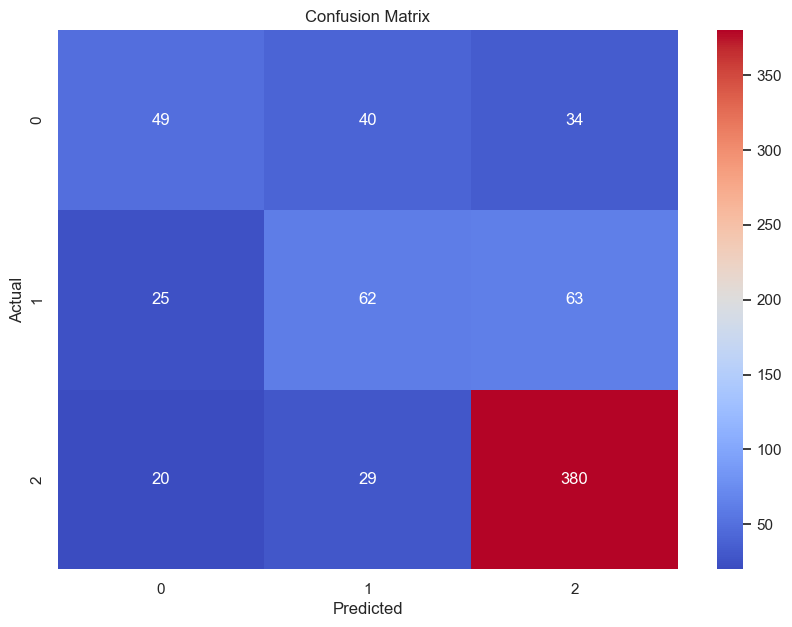

In [24]:
# Przewidywanie na zbiorze testowym
y_pred = best_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)  # Lista unikalnych klas

# Rysowanie heatmapy macierzy konfuzji
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

print(classification_report(y_test, y_pred))

## Wnioski:
### Metoda drzewa klasyfikacyjnego dała stosunkowo dobre wyniki, z dokładnością równą 70%. Ten model najlepiej poradził sobie z przyporządkowaniem studentów do grupy która z powodzeniem ukończyła studia. W przypadku grupy opuszczającej studia dokładność to 44%.

# Support Vector Machines (SVM)

Support Vector Machine to nadzorowany algorytm uczenia się, który szuka optymalnej hiperpłaszczyzny oddzielającej próbki różnych klas z maksymalnym marginesem. SVM jest efektywny w wysokowymiarowych przestrzeniach cech

Opis i wzory

### Wzór dla metody SVM:

$
f(x) = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b\right)
$

gdzie:

- $f(x)$ to funkcja decyzyjna,
- $\alpha_i$ to współczynniki Lagrange'a,
- $y_i$ to etykiety klas,
- $x_i$ to punkty treningowe,
- $x$ to punkt testowy,
- $K(x_i, x)$ to funkcja jądra,
- $b$ to wyraz wolny (bias).


Wzór ten opisuje sposób, w jaki metoda SVM dokonuje klasyfikacji punktu testowego \( x \) na podstawie jego położenia względem granicy decyzyjnej.


### parametry:
- C - parametr regularyzacji
- gamma - definiuje jak daleko wpływ jednej próbki może sięgać
- kernel - przekształca dane wejściowe do wyższej przestrzeni wymiarowej

Best parameters found:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.64      0.53      0.58       123
           1       0.50      0.37      0.43       150
           2       0.81      0.92      0.86       429

    accuracy                           0.74       702
   macro avg       0.65      0.61      0.62       702
weighted avg       0.71      0.74      0.72       702



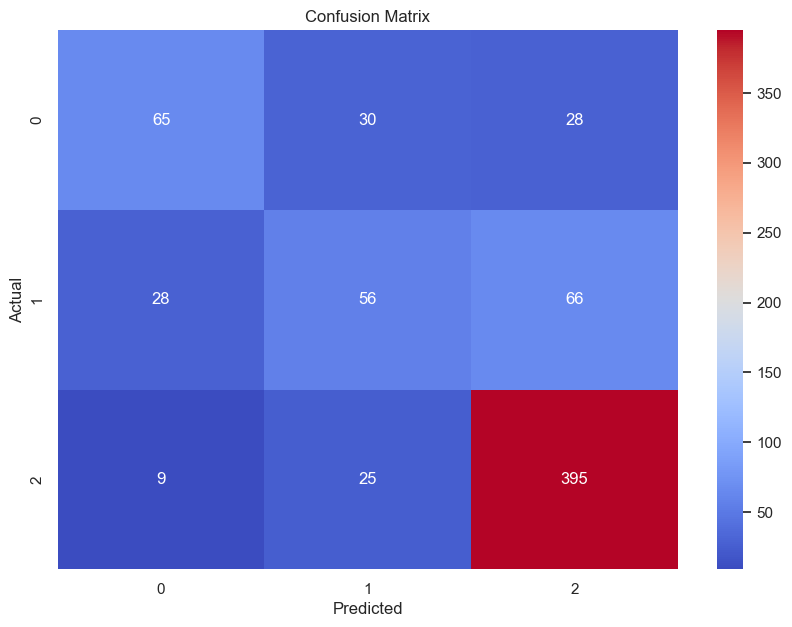

In [24]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Inicjalizacja modelu SVM
svm = SVC(random_state=42)

# Inicjalizacja Grid Search
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=2, n_jobs=2, verbose=0)

# Dopasowanie Grid Search do zbalansowanych danych
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print("Best parameters found: ", grid_search.best_params_)

# Trenowanie modelu z najlepszymi parametrami
best_svm = grid_search.best_estimator_

# Przewidywanie na zbiorze testowym
y_pred = best_svm.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)  # Lista unikalnych klas

# Rysowanie heatmapy macierzy konfuzji
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

print(classification_report(y_test, y_pred))

## Wnioski:
### Metoda SVM dała wyniki lepsze od swojego poprzednika, jej dokładność wyniosła 74%. Poprawnie sklasyfikowała 395 studentów którzy ukończyli studia. Dobry wynik tej metody wynika z jej efektywności w przypadku cech wysokowymiarowych. Niestety w przypadku przewidywania opuszczenia studiów wyniki modelu są porównywalne do drzewa klasyfikacyjnego.

## Naive Bayes

Naive Bayes to prosty probabilistyczny klasyfikator oparty na twierdzeniu Bayesa z założeniem niezależności cech, co oznacza, że zakłada on, iż każda cecha przyczynia się niezależnie do prawdopodobieństwa przynależności do danej klasy. Jest efektywny przy dużych zbiorach danych

opis i wzory

### Wzory dla metody Naive Bayes

$P\left(x_i \mid y\right)=\frac{1}{\sqrt{2 \pi \sigma_y^2}} \exp \left(-\frac{\left(x_i-\mu_y\right)^2}{2 \sigma_y^2}\right)$

gdzie:

- $x_i$ to wartość \( i \)-tej cechy,
- $y$ to klasa,
- $sigma_y$ to odchylenie standardowe cechy $x_i$ dla klasy $y$,
- $exp$ to funkcja wykładnicza.

### parametry
- var_smoothing - parametr wygładzania wariancji

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters found:  {'var_smoothing': 0.1}
              precision    recall  f1-score   support

           0       0.50      0.02      0.05       123
           1       0.47      0.24      0.32       150
           2       0.68      0.98      0.80       429

    accuracy                           0.66       702
   macro avg       0.55      0.42      0.39       702
weighted avg       0.60      0.66      0.57       702



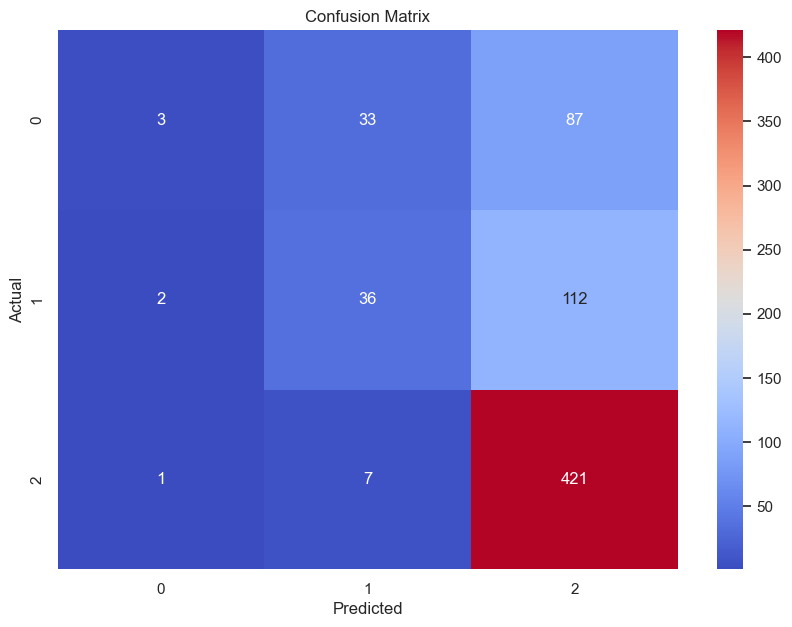

In [24]:
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Inicjalizacja modelu Naive Bayes
nb = GaussianNB()

# Inicjalizacja Grid Search
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Dopasowanie Grid Search do zbalansowanych danych
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print("Best parameters found: ", grid_search.best_params_)

# Trenowanie modelu z najlepszymi parametrami
best_nb = grid_search.best_estimator_

# Przewidywanie na zbiorze testowym
y_pred = best_nb.predict(X_test)

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

# Rysowanie heatmapy macierzy konfuzji
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

print(classification_report(y_test, y_pred))

## Wnioski
### Metoda Naive Bayes niestety poradziła sobie gorzej od swoich poprzedników. Posiada dokładność na poziomie 66%. Niefektywność tej metody wynika prawdopodobnie z faktu, że cechy w niej są uznawane za niezależne.

# Metoda Najbliższego sąsiada (KNN)

Metoda najbliższego sąsiada klasyfikuje próbki na podstawie głosowania najbliższych k sąsiadów w przestrzeni cech, gdzie k jest ustalonym parametrem. Jest łatwa do zaimplementowania i nie wymaga założeń dotyczących rozkładu danych, ale może być nieefektywna obliczeniowo przy dużych zbiorach danych.

### Wzór dla KNN:

$
\hat{y} = \arg\max_{y_i} \left( \sum_{i=1}^{k} I(y_i = j) \right)
$

gdzie:
- $\hat{y}$ to przewidywana klasa dla nowego punktu,
- $y_i$ to klasy sąsiadów (dla \( i = 1, 2, ..., k \)),
- $j$ to kolejne klasy decyzyjne,
- $I(y_i = j)$ to funkcja indykatorowa.

Ten wzór wybiera klasę, która jest najczęściej reprezentowana wśród \( k \) najbliższych sąsiadów nowego punktu.


### parametry
- n_neighbours - liczba najbliższych sąsiadów
- weights - sposób ważenia sąsiadów przy podejmowaniu decyzji o klasyfikacji

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameters found:  {'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.49      0.30      0.37       123
           1       0.42      0.20      0.27       150
           2       0.73      0.94      0.82       429

    accuracy                           0.67       702
   macro avg       0.55      0.48      0.49       702
weighted avg       0.62      0.67      0.62       702



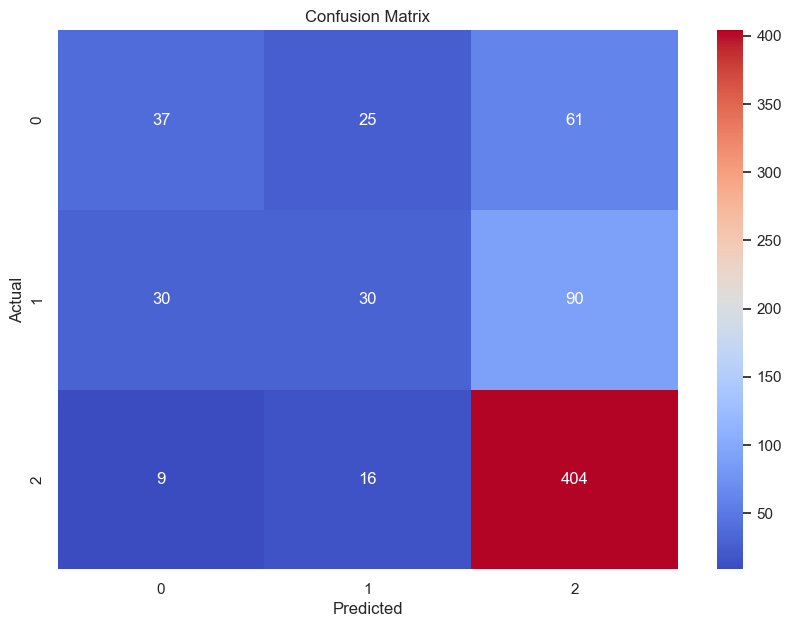

In [25]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Inicjalizacja modelu KNN
knn = KNeighborsClassifier()

# Inicjalizacja Grid Search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Dopasowanie Grid Search do danych treningowych
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print("Best parameters found: ", grid_search.best_params_)

# Trenowanie modelu z najlepszymi parametrami
best_knn = grid_search.best_estimator_

# Przewidywanie na zbiorze testowym
y_pred = best_knn.predict(X_test)

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

# Rysowanie heatmapy macierzy konfuzji
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Wyświetlenie raportu klasyfikacji
print(classification_report(y_test, y_pred))

## Wnioski:
### Dokładność KNN to 67%. Metoda ta bardzo dobrze poradziła sobie z przyporządkowaniem studentów do grupy "graduate", za to bardzo słabo w przypadku grupy "dropout". Jej słabszy wynik wynikać może z faktu nieefektywności tej metody na dużych zbiorach danych

# Metoda sieci neuronowych

Sieci neuronowe są złożonymi modelami matematycznymi inspirowanymi strukturą ludzkiego mózgu, składającymi się z warstw neuronów (węzłów) połączonych wagami. Są one niezwykle wszechstronne i potrafią modelować złożone nieliniowe zależności w danych, co czyni je potężnymi narzędziami

### Wzory dla metody sieci neuronowych:

Metoda sieci neuronowych obejmuje wiele kroków i warstw, dlatego trudno jest przedstawić ją za pomocą pojedynczego wzoru. Niemniej jednak, możemy przedstawić ogólny wzór dla propagacji w przód (feedforward) w jednej warstwie:

$
z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)}
$

$
a^{(l)} = g(z^{(l)})
$

gdzie:
- $z^{(l)}$ to wektor aktywacji dla warstwy $l$,
- $W^{(l)}$ to macierz wag dla warstwy $l$,
- $a^{(l-1)}$ to wektor aktywacji z poprzedniej warstwy,
- $b^{(l)}$ to wektor obciążenia dla warstwy $l$,
- $g$ to funkcja aktywacji.

Ten wzór opisuje proces propagacji w przód w jednej warstwie sieci neuronowej, który jest podstawowym krokiem w wielu modelach sieci neuronowych.


### parametry:
- hidden_layer_sizes - określa liczbę neuronów w każdej ukrytej warstwie sieci neuronowej
- activation - funkcja aktywacji stosowana do wprowadzania nieliniowości do modelu
- solver - algorytm służący do optymalizacji wag sieci neuronowej
- alpha - parametr regularyzacji L2, który pomaga zapobiegać przeuczeniu (overfitting) przez dodanie kary za duże wagi

Fitting 2 folds for each of 72 candidates, totalling 144 fits
Best parameters found:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.64      0.51      0.57       123
           1       0.49      0.39      0.44       150
           2       0.81      0.92      0.86       429

    accuracy                           0.74       702
   macro avg       0.65      0.61      0.62       702
weighted avg       0.72      0.74      0.72       702



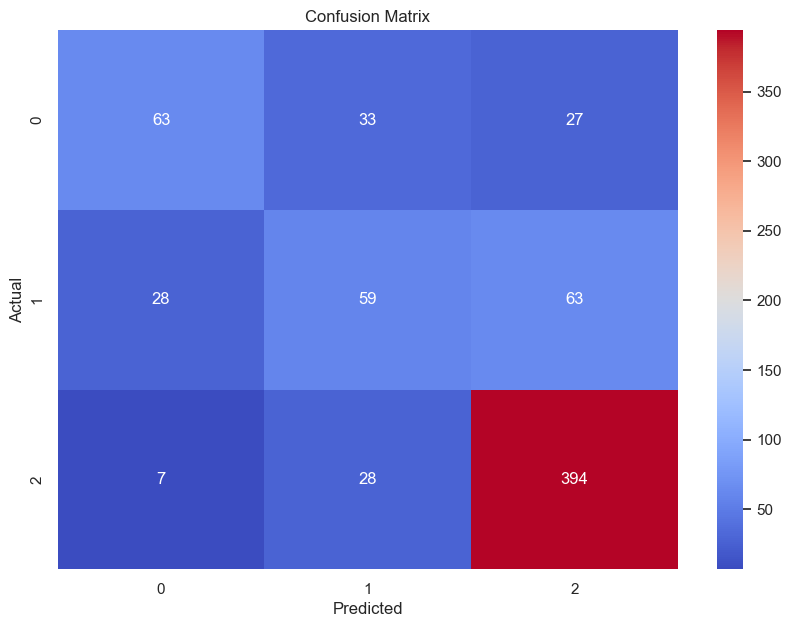

In [26]:
# Parametry do przetestowania
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  
    'activation': ['logistic', 'tanh', 'relu'],  
    'solver': ['adam', 'sgd'],  
    'alpha': [0.0001, 0.001, 0.01],  
}

# Inicjalizacja modelu MLP
mlp = MLPClassifier(max_iter=1000)  # max_iter ustawione na 1000, aby upewnić się, że model osiągnie zbieżność

# Inicjalizacja Grid Search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Dopasowanie Grid Search do danych treningowych
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print("Best parameters found: ", grid_search.best_params_)

# Trenowanie modelu z najlepszymi parametrami
best_mlp = grid_search.best_estimator_

# Przewidywanie na zbiorze testowym
y_pred = best_mlp.predict(X_test)

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

# Rysowanie heatmapy macierzy konfuzji
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Wyświetlenie raportu klasyfikacji
print(classification_report(y_test, y_pred))


## Wnioski:
### Dokładność tej metody to 74% i ponownie tak jak w przypadku poprzednich metod ten model także najlepiej radzi sobie z grupą "graduate". Dokładność dla grupy "dropout" to 39%.

# Metoda random forest

Lasy losowe to metoda zespołowa oparta na wielu drzewach decyzyjnych, gdzie każda decyzja opiera się na głosowaniu wielu drzew klasyfikacyjnych, aby poprawić dokładność i kontrolować przeuczenie. Dzięki losowemu wybieraniu próbek i cech, lasy losowe oferują większą stabilność i odporność na szum w danych w porównaniu do pojedynczych drzew decyzyjnych

### Wzór dla głosowania większościowego w Random Forest:

$
\hat{y} = \arg\max_{j} \left( \sum_{i=1}^{T} I(y_i = j) \right)
$

gdzie:

- $\hat{y}$: Przewidywana klasa dla danej próbki.
- $T$: Liczba drzew w lesie (parametr `n_estimators`).
- $y_i$: Przewidywana klasa przez $i$-te drzewo.
- $j$: Poszczególne klasy decyzyjne.
- $I(y_i = j)$: Funkcja indykatorowa, która zwraca $1$, jeśli klasa przewidywana przez $i$-te drzewo jest równa $j$, a $0$ w przeciwnym razie.


              precision    recall  f1-score   support

           0       0.67      0.54      0.60       123
           1       0.56      0.31      0.40       150
           2       0.79      0.96      0.87       429

    accuracy                           0.75       702
   macro avg       0.68      0.60      0.62       702
weighted avg       0.72      0.75      0.72       702



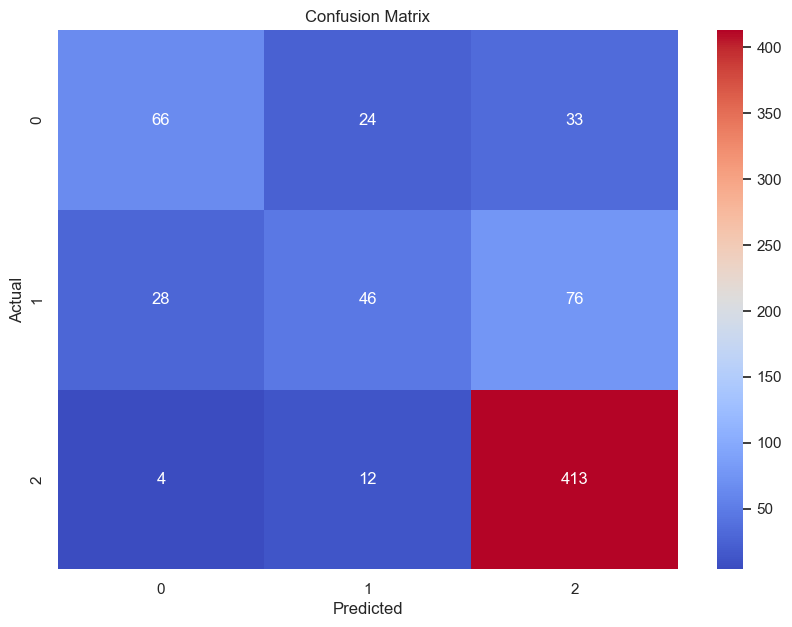

In [27]:
# Inicjalizacja modelu lasu losowego
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Ustawienie liczby drzew na 100

# Trenowanie modelu
rf_model.fit(X_train, y_train)

# Predykcje na zbiorze testowym
y_pred = rf_model.predict(X_test)

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

# Rysowanie heatmapy macierzy konfuzji
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Wyświetlenie raportu klasyfikacji
print(classification_report(y_test, y_pred))

## Wnioski:
### Ogólny wynik to 75% poprawności. Ogółem 525 zmiennych w tej metodzie zostało poprawnie podporządkowane do swojej grupy, za to 177 niepoprawnie

# Model hybrydowy

 Metoda hybrydowego modelu z głosowaniem polega na połączeniu dotychczas użytych modeli i wykorzystaniu ich werdyktu do podjęcia ostatecznej decyzji klasyfikacyjnej przez głosowanie większościowe ("hard voting"). Dzięki połączeniu wyników z wielu modeli, hybrydowy model może zwiększyć ogólną dokładność predykcji i poprawić stabilność wyników w porównaniu do pojedynczych modeli.

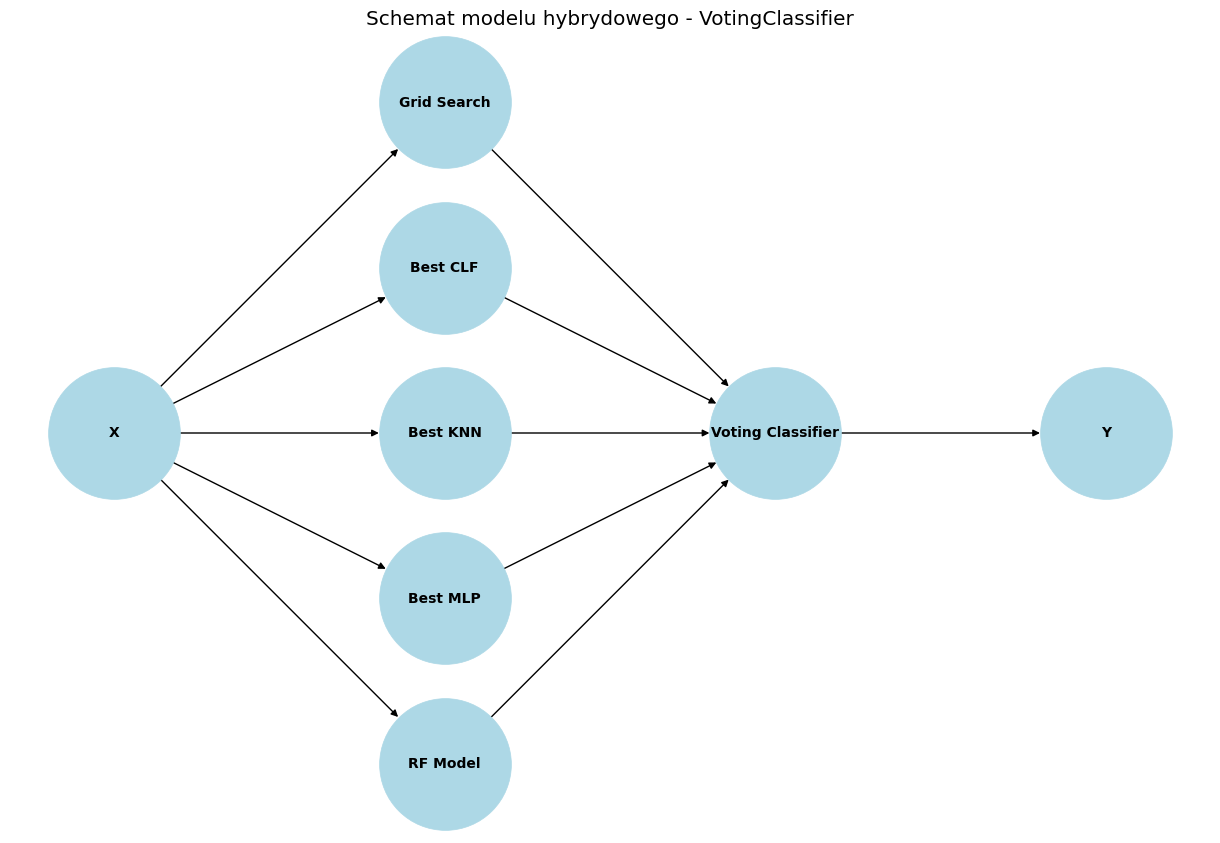

In [5]:
# Utwórz nowy graf
G = nx.DiGraph()

# Dodaj węzły
G.add_node("X", pos=(0, 2))
G.add_node("Grid Search", pos=(2, 4))
G.add_node("Best CLF", pos=(2, 3))
G.add_node("Best KNN", pos=(2, 2))
G.add_node("Best MLP", pos=(2, 1))
G.add_node("RF Model", pos=(2, 0))
G.add_node("Voting Classifier", pos=(4, 2))
G.add_node("Y", pos=(6, 2))

# Dodaj krawędzie
G.add_edge("X", "Grid Search")
G.add_edge("X", "Best CLF")
G.add_edge("X", "Best KNN")
G.add_edge("X", "Best MLP")
G.add_edge("X", "RF Model")
G.add_edge("Grid Search", "Voting Classifier")
G.add_edge("Best CLF", "Voting Classifier")
G.add_edge("Best KNN", "Voting Classifier")
G.add_edge("Best MLP", "Voting Classifier")
G.add_edge("RF Model", "Voting Classifier")
G.add_edge("Voting Classifier", "Y")

# Pozycje węzłów
pos = nx.get_node_attributes(G, 'pos')

# Narysuj graf
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=9000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title('Schemat modelu hybrydowego - VotingClassifier')
plt.show()


Fitting 2 folds for each of 72 candidates, totalling 144 fits
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       123
           1       0.55      0.28      0.37       150
           2       0.80      0.94      0.87       429

    accuracy                           0.74       702
   macro avg       0.66      0.61      0.62       702
weighted avg       0.71      0.74      0.72       702



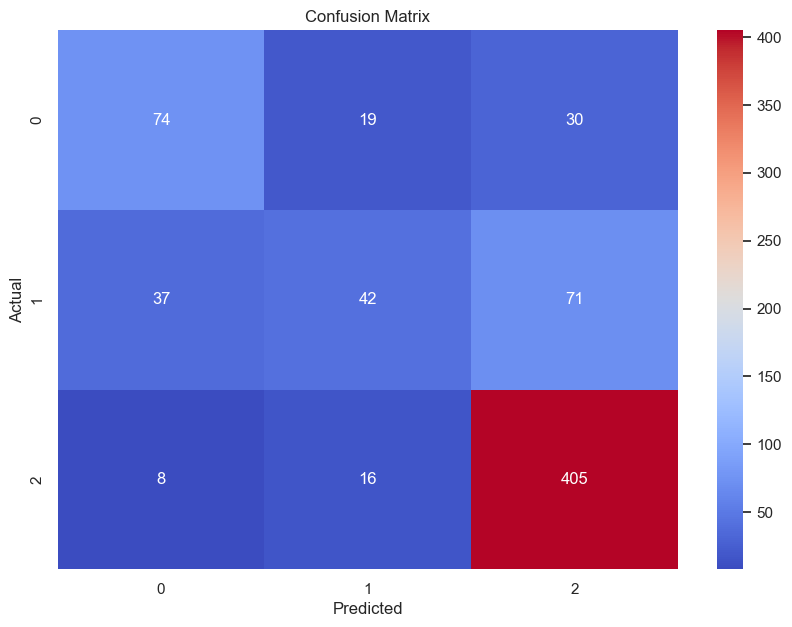

In [30]:
# Inicjalizacja hybrydowego modelu z głosowaniem
hybrid_model = VotingClassifier(estimators=[
    ('sv', grid_search),
    ('clf', best_clf),
    ('knn', best_knn),
    ('mlp', best_mlp),
    ('rf', rf_model)
], voting='hard')  # 'hard' oznacza głosowanie większościowe

# Trenowanie hybrydowego modelu
hybrid_model.fit(X_train, y_train)

# Predykcje na zbiorze testowym
y_pred = hybrid_model.predict(X_test)

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)

# Rysowanie heatmapy macierzy konfuzji
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Wyświetlenie raportu klasyfikacji
print(classification_report(y_test, y_pred))

## Wnioski:
### Metoda hybrydowa, która jest niejako połączeniem wszystkich pozostałych sposobów klasyfikacji dała ogólnie wynik na poziomie 74% co jest dość dobrym, choć oczywiście nieidealnym wynikiem. Ponownie najlepiej prezentuje się klasyfikowanie do grypy kończącej studia bo jest to aż 94%. 

## Końcowe wnioski i porównanie metod

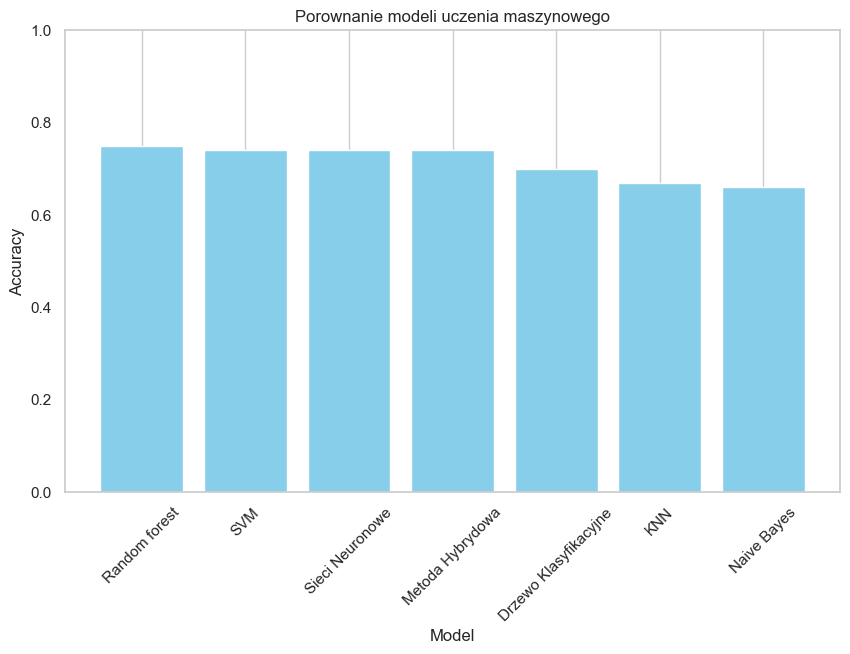

In [37]:
results = {
    'Model': ['Drzewo Klasyfikacyjne', 'SVM', 'Naive Bayes', 'KNN', 'Sieci Neuronowe', 'Random forest', 'Metoda Hybrydowa'],
    'Dokladnosc': [0.70, 0.74, 0.66, 0.67, 0.74, 0.75, 0.74]
}


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Dokladnosc', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Dokladnosc'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Porownanie modeli uczenia maszynowego')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()

### Nasze modele dały bardzo podobne wyniki. Najlepszym z nich okazał się Random forest, najsłabszym natomiast Naive Bayes. Są to jednak dośc nieznaczne różnice i wszystkie modele możemy uznać za równie wartościowe. Podsumowując nasz projekt można stwierdzić, że przewidywanie czegoś takiego jak opuszczenie studiów to ciężkie zadanie, ponieważ jest to bardzo personalna decyzja i każdy ma swoje indywidualne powody do podjęcia takiego wyboru. Nasze modele okazały się lepsze w przyporządkowywaniu studentów do grupy która z powodzeniem ukończy studia, co również może mieć swoje zastosowanie.  

# Predykcje dla losowych zmiennych

### Trenowanie modelu hybrydowego z najlepszymi parametrami wziętymi z powyższych optymalizacji

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

warnings.filterwarnings('ignore')

best_params_rf = {
    'n_estimators': 100,
    'random_state': 42
}

best_params_svc = {
    'C': 0.1,
    'gamma': 'scale',
    'kernel': 'linear',
    'random_state': 42
}

best_params_dt = {
    'criterion': 'gini',
    'max_depth': 8,
    'random_state': 42
}

best_params_nb = {
    'var_smoothing': 0.1
}

best_params_knn = {
    'n_neighbors': 9,
    'weights': 'distance',
}

best_params_mlp = {
    'hidden_layer_sizes': (100,),
    'activation': 'logistic',
    'solver': 'adam',
    'max_iter': 1000,
    'alpha': 0.0001,
    'random_state': 42
}

rf_model = RandomForestClassifier(**best_params_rf)
svc_model = SVC(**best_params_svc, probability=True)
dt_model = DecisionTreeClassifier(**best_params_dt)
nb_model = GaussianNB(**best_params_nb)
knn_model = KNeighborsClassifier(**best_params_knn)
mlp_model = MLPClassifier(**best_params_mlp)

hybrid_model = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('svc', svc_model),
    ('decision_tree', dt_model),
    ('naive_bayes', nb_model),
    ('knn', knn_model),
    ('mlp', mlp_model)
], voting='soft') 

hybrid_model.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('svc',
                              SVC(C=0.1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('decision_tree',
                              DecisionTreeClassifier(max_depth=8,
                                                     random_state=42)),
                             ('naive_bayes', GaussianNB(var_smoothing=0.1)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=9,
                                                   weights='distance')),
                             ('mlp',
                              MLPClassifier(activation='logistic',
                                            max_iter=1000, random_state=42))],
                 voting='soft')

Raport klasyfikacji dla losowych danych:
              precision    recall  f1-score   support

           0       0.52      0.09      0.16       504
           1       0.49      0.35      0.41       496
           2       0.00      0.00      0.00         0

    accuracy                           0.22      1000
   macro avg       0.34      0.15      0.19      1000
weighted avg       0.50      0.22      0.28      1000



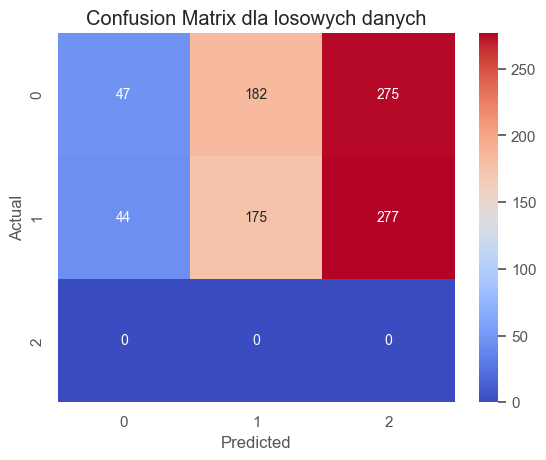

In [45]:
y_pred = hybrid_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

sample_X = np.random.rand(1000, X_train.shape[1]) 
sample_predictions = hybrid_model.predict(sample_X)

random_X = np.random.rand(1000, X_train.shape[1])
random_y = np.random.randint(0, 2, 1000)
random_predictions = hybrid_model.predict(random_X)

random_report = classification_report(random_y, random_predictions, output_dict=True)
print("Raport klasyfikacji dla losowych danych:")
print(classification_report(random_y, random_predictions))

conf_matrix_random = confusion_matrix(random_y, random_predictions)
sns.heatmap(conf_matrix_random, annot=True, cmap='coolwarm', fmt='g')
plt.title('Confusion Matrix dla losowych danych')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Powyższe predykcje pokazują, iż w przypadku wybrania losowych danych nasz model się nie sprawdza w przyporządkowywaniu studentów do grup. Dokładność wyniosła zaledwie 22%. Świadczy ona o poprawnym wytrenowaniu naszych modeli.

# Bibliografia

1. Realinho, Valentim, Jorge Machado, Luís Baptista, and Mónica V. Martins. 2022. "Predicting Student Dropout and Academic Success" Data 7, no. 11: 146. https://doi.org/10.3390/data7110146
2. Szymański Piotr, Kajdanowicz Tomasz. 2017. "A scikit-based Python environment for performing multi-label classification", https://arxiv.org/abs/1702.01460